In [39]:
import chess.pgn
import pandas as pd
import re

In [49]:
for year in range(2013, 2014):
    for month in range(1,13):
        if month < 10:
            string_month = "0" + str(month)
        else:
            string_month = str(month)

        file_name = f"f:/lichess_data/lichess_db_standard_rated_{year}-{string_month}.pgn"

        

        pgn = open(file_name)
        games = []
        j = 0
        while True:
            print(f"Converting to list | {year} | {string_month} | {j}")
            game= chess.pgn.read_game(pgn)
            if game is not None:
                games.append(game)
                j += 1
            else: 
                break

        def count_moves_and_checkmate(moves):
            move_pattern = re.compile(r'\d+\.\s+(\S+)')

            # Extract moves using the pattern
            extracted_moves = move_pattern.findall(moves)

            # Count the number of extracted moves
            num_moves = len(extracted_moves)
            checkmate = moves.endswith("#")  # Check if the last move ends with '#', indicating checkmate
            return num_moves, checkmate
        
        list_of_games = []
        i = 0
        for game in games:
            try:
                print(f"Converting to dict | {year} | {string_month} | {i} / {len(games)}")
                moves = str(game.mainline_moves())
                num_moves, checkmate = count_moves_and_checkmate(moves)
                
                individual_game = {
                "Event": game.headers["Event"], 
                "Site": game.headers["Site"], 
                "White": game.headers["White"], 
                "Black": game.headers["Black"], 
                "Result": game.headers["Result"], 
                "UTCDate": game.headers["UTCDate"], 
                "UTCTime": game.headers["UTCTime"],
                "WhiteElo": game.headers["WhiteElo"], 
                "BlackElo": game.headers["BlackElo"], 
                "WhiteRatingDiff": game.headers["WhiteRatingDiff"], 
                "BlackRatingDiff": game.headers["BlackRatingDiff"], 
                "ECO": game.headers["ECO"],
                "Opening": game.headers["Opening"], 
                "TimeControl": game.headers["TimeControl"], 
                "Termination": game.headers["Termination"], 
                "Moves": moves,
                "NumMoves": num_moves,
                "Checkmate": checkmate}
                
                list_of_games.append(individual_game)
                i += 1
            except KeyError:
                pass  # skip the incomplete entries

            print(f"Saving for... {year}_{month}")
            pd.DataFrame(list_of_games).to_csv(f"{year}_{month}.csv")
                    
    

f:/lichess_data/lichess_db_standard_rated_2013-01.pgn
f:/lichess_data/lichess_db_standard_rated_2013-02.pgn
f:/lichess_data/lichess_db_standard_rated_2013-03.pgn
f:/lichess_data/lichess_db_standard_rated_2013-04.pgn
f:/lichess_data/lichess_db_standard_rated_2013-05.pgn
f:/lichess_data/lichess_db_standard_rated_2013-06.pgn
f:/lichess_data/lichess_db_standard_rated_2013-07.pgn
f:/lichess_data/lichess_db_standard_rated_2013-08.pgn
f:/lichess_data/lichess_db_standard_rated_2013-09.pgn
f:/lichess_data/lichess_db_standard_rated_2013-10.pgn
f:/lichess_data/lichess_db_standard_rated_2013-11.pgn
f:/lichess_data/lichess_db_standard_rated_2013-12.pgn


In [4]:
pgn

<_io.TextIOWrapper name='lichess_db_standard_rated_2013-12.pgn' mode='r' encoding='UTF-8'>

In [5]:
games = []
while True:
    game= chess.pgn.read_game(pgn)
    if game is not None:
        games.append(game)
    else: 
        break

In [6]:
len(games)

578262

In [7]:
print(games[0])

[Event "Rated Blitz game"]
[Site "https://lichess.org/pgnm3ztm"]
[Date "????.??.??"]
[Round "?"]
[White "ASTROSCEPTRE"]
[Black "danilober"]
[Result "0-1"]
[UTCDate "2013.11.30"]
[UTCTime "23:00:16"]
[WhiteElo "1253"]
[BlackElo "1586"]
[WhiteRatingDiff "-6"]
[BlackRatingDiff "+3"]
[ECO "C42"]
[Opening "Russian Game: Urusov Gambit"]
[TimeControl "300+2"]
[Termination "Normal"]

1. e4 e5 2. Bc4 Nf6 3. Nf3 Nxe4 4. Bxf7+ Kxf7 5. Nxe5+ Kg8 6. O-O d6 7. Nc4 b5 8. Ne3 Bb7 9. d3 Nf6 10. c3 g6 11. f4 Bg7 12. f5 Nc6 13. Qb3+ Kf8 14. fxg6 hxg6 15. Ng4 Ne5 16. Nxf6 Bxf6 17. d4 Ng4 18. Bg5 Kg7 19. Bxf6+ Nxf6 20. Qe6 Re8 21. Qh3 Re2 22. Na3 Rxg2+ 0-1


In [8]:
print(games[0].mainline_moves())

1. e4 e5 2. Bc4 Nf6 3. Nf3 Nxe4 4. Bxf7+ Kxf7 5. Nxe5+ Kg8 6. O-O d6 7. Nc4 b5 8. Ne3 Bb7 9. d3 Nf6 10. c3 g6 11. f4 Bg7 12. f5 Nc6 13. Qb3+ Kf8 14. fxg6 hxg6 15. Ng4 Ne5 16. Nxf6 Bxf6 17. d4 Ng4 18. Bg5 Kg7 19. Bxf6+ Nxf6 20. Qe6 Re8 21. Qh3 Re2 22. Na3 Rxg2+


In [9]:
games[0].headers["Event"]

'Rated Blitz game'

In [11]:
moves = str(games[0].mainline_moves())

In [12]:
individual_game = {
    "Event": games[0].headers["Event"], 
    "Site": games[0].headers["Site"], 
    "White": games[0].headers["White"], 
    "Black": games[0].headers["Black"], 
    "Result": games[0].headers["Result"], 
    "UTCDate": games[0].headers["UTCDate"], 
    "UTCTime": games[0].headers["UTCTime"],
    "WhiteElo": games[0].headers["WhiteElo"], 
    "BlackElo": games[0].headers["BlackElo"], 
    "WhiteRatingDiff": games[0].headers["WhiteRatingDiff"], 
    "BlackRatingDiff": games[0].headers["BlackRatingDiff"], 
    "ECO": games[0].headers["ECO"],
    "Opening": games[0].headers["Opening"], 
    "TimeControl": games[0].headers["TimeControl"], 
    "Termination": games[0].headers["Termination"], 
    "Moves": str(games[0].mainline_moves())
}

In [40]:
def count_moves_and_checkmate(moves):
    move_pattern = re.compile(r'\d+\.\s+(\S+)')

    # Extract moves using the pattern
    extracted_moves = move_pattern.findall(moves)

    # Count the number of extracted moves
    num_moves = len(extracted_moves)
    checkmate = moves.endswith("#")  # Check if the last move ends with '#', indicating checkmate
    return num_moves, checkmate

In [41]:
list_of_games = []
for game in games:
    try:
        moves = str(game.mainline_moves())
        num_moves, checkmate = count_moves_and_checkmate(moves)
        
        individual_game = {
        "Event": game.headers["Event"], 
        "Site": game.headers["Site"], 
        "White": game.headers["White"], 
        "Black": game.headers["Black"], 
        "Result": game.headers["Result"], 
        "UTCDate": game.headers["UTCDate"], 
        "UTCTime": game.headers["UTCTime"],
        "WhiteElo": game.headers["WhiteElo"], 
        "BlackElo": game.headers["BlackElo"], 
        "WhiteRatingDiff": game.headers["WhiteRatingDiff"], 
        "BlackRatingDiff": game.headers["BlackRatingDiff"], 
        "ECO": game.headers["ECO"],
        "Opening": game.headers["Opening"], 
        "TimeControl": game.headers["TimeControl"], 
        "Termination": game.headers["Termination"], 
        "Moves": moves,
        "NumMoves": num_moves,
        "Checkmate": checkmate}
        
        list_of_games.append(individual_game)
    except KeyError:
        pass  # skip the incomplete entries

In [43]:
pd.DataFrame(list_of_games).to_csv("2013_12.csv")

In [16]:
board = game.board()

In [44]:
for move in game.mainline_moves():
    board.push(move)

AssertionError: push() expects move to be pseudo-legal, but got f2f4 in 8/5R2/4Q1k1/p4R2/6P1/8/4p2K/8

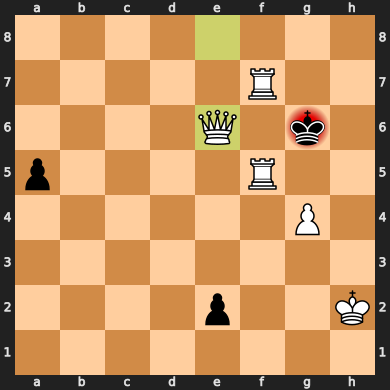

In [18]:
board

In [19]:
game.mainline_moves()

<Mainline at 0x1e69568c190 (1. f4 f5 2. Nf3 Na6 3. d4 d5 4. c3 c6 5. e3 b5 6. Be2 b4 7. O-O e6 8. Ne5 Nf6 9. Nxc6 Qc7 10. Ne5 Ne4 11. Qa4+ Ke7 12. Bxa6 bxc3 13. Nc6+ Kf6 14. bxc3 Bxa6 15. Qxa6 g5 16. fxg5+ Nxg5 17. Nb4 Bd6 18. Ba3 Bxh2+ 19. Kh1 Kg7 20. Qc6 Qxc6 21. Nxc6 Bc7 22. Re1 h5 23. Nd2 h4 24. Ne5 h3 25. g3 Ba5 26. Bb4 Bc7 27. Be7 Bxe5 28. dxe5 Ne4 29. Nxe4 dxe4 30. Bf6+ Kg6 31. Bxh8 Rxh8 32. Rad1 Rc8 33. Rd6 Rxc3 34. Rxe6+ Kf7 35. Rf6+ Ke7 36. Rxf5 Ke6 37. Rh5 Rc2 38. Rf1 Rxa2 39. Rf6+ Ke7 40. Rh7+ Ke8 41. Rg6 Kf8 42. Rc6 Kg8 43. Rxh3 Ra3 44. g4 Ra5 45. Re6 Kf7 46. Rf6+ Kg7 47. Rh5 Ra3 48. Rhf5 Rxe3 49. e6 Rh3+ 50. Kg2 e3 51. Rf7+ Kg6 52. e7 e2 53. e8=Q Rh2+ 54. Kxh2 a5 55. Qe6#)>

In [34]:
aa, bb = count_moves_and_checkmate("1. e4 { [%eval 0.24] } 1... e5 { [%eval 0.26] } 2. Nf3 { [%eval 0.26] } 2... Nc6 { [%eval 0.38] } 3. d4 { [%eval 0.16] } 3... exd4 { [%eval 0.0] } 4. Bc4 { [%eval -0.34] } 4... d6 $6 { [%eval 0.4] } 5. Nxd4 { [%eval 0.34] } 5... Nxd4 { [%eval 0.54] } 6. Qxd4 { [%eval 0.54] } 6... Be6 { [%eval 0.78] } 7. Nc3 { [%eval 0.76] } 7... Nf6 { [%eval 0.8] } 8. Bg5 { [%eval 0.72] } 8... Be7 { [%eval 0.7] } 9. Bxe6 { [%eval 0.56] } 9... fxe6 { [%eval 0.48] } 10. O-O-O { [%eval 0.22] } 10... h6 $6 { [%eval 0.98] } 11. Be3 { [%eval 0.9] } 11... O-O { [%eval 0.9] } 12. g4 $2 { [%eval -0.92] } 12... Nxg4 { [%eval -0.88] } 13. Rhg1 { [%eval -0.88] } 13... Bf6 { [%eval -0.84] } 14. Qc4 { [%eval -0.94] } 14... Nxe3 { [%eval -0.92] } 15. fxe3 { [%eval -1.09] } 15... Bxc3 $6 { [%eval -0.52] } 16. Qxe6+ { [%eval -0.76] } 16... Kh8 { [%eval -0.6] } 17. bxc3 { [%eval -0.64] } 17... Rf6 { [%eval -0.48] } 18. Qc4 { [%eval -0.86] } 18... Qe7 { [%eval -0.76] } 19. Rdf1 { [%eval -1.03] } 19... c5 $6 { [%eval -0.24] } 20. Qd5 { [%eval -0.66] } 20... Raf8 { [%eval -0.84] } 21. Rxf6 { [%eval -1.03] } 21... Rxf6 { [%eval -0.98] } 22. Kd2 { [%eval -1.39] } 22... b5 { [%eval -0.9] } 23. Qa8+ $6 { [%eval -1.63] } 23... Kh7 { [%eval -2.02] } 24. Qd5 { [%eval -1.97] } 24... Rf2+ { [%eval -2.02] } 25. Kd3 $4 { [%eval #-10] } 25... Rxh2 $4 { [%eval -2.44] } 26. Qf5+ { [%eval -2.4] } 26... Kg8 { [%eval -2.54] } 27. Qf4 $4 { [%eval #-2] } 27... Rh4 $4 { [%eval -2.16] } 28. Qf3 $6 { [%eval -2.84] } 28... c4+ { [%eval -2.54] } 29. Kd2 { [%eval -2.66] } 29... Rxe4 { [%eval -2.7] } 30. Qh3 { [%eval -3.07] } 30... Re6 { [%eval -2.98] } 31. Qf3 { [%eval -3.29] } 31... Qf6 { [%eval -3.29] }")

In [35]:
aa

62

In [38]:
import re

# Sample move list
moves = str(game.mainline_moves())

# Regular expression pattern to extract moves with the format "1. ...", "2. ...", etc.
move_pattern = re.compile(r'\d+\.\s+(\S+)')

# Extract moves using the pattern
extracted_moves = move_pattern.findall(moves)

# Count the number of extracted moves
num_moves = len(extracted_moves)

# Display the number of moves
print("Number of moves:", num_moves)


Number of moves: 55


In [1]:
import pandas as pd 
import glob 
import os 
  
joined_files = os.path.join("f:/lichess_data/csv_data/", "*.csv") 

# A list of all joined files is returned 
joined_list = glob.glob(joined_files) 

df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True) 

         Unnamed: 0                 Event                          Site  \
0                 0  Rated Classical game  https://lichess.org/j1dkb5dw   
1                 1  Rated Classical game  https://lichess.org/a9tcp02g   
2                 2  Rated Classical game  https://lichess.org/szom2tog   
3                 3     Rated Bullet game  https://lichess.org/rklpc7mk   
4                 4     Rated Bullet game  https://lichess.org/1xb3os63   
...             ...                   ...                           ...   
3380728      324774  Rated Classical game  https://lichess.org/2ad1d2kq   
3380729      324775  Rated Classical game  https://lichess.org/f6wmpmde   
3380730      324776  Rated Classical game  https://lichess.org/8wny7ye1   
3380731      324777      Rated Blitz game  https://lichess.org/tptxxgsf   
3380732      324778     Rated Bullet game  https://lichess.org/6gjww8l4   

                       White                 Black   Result     UTCDate  \
0                      B

In [3]:
df.tail()

,Unnamed: 0,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,NumMoves,Checkmate
3380728,324774,Rated Classical game,https://lichess.org/2ad1d2kq,milanc,eliasmorenorodrigues,0-1,2013.09.30,21:58:36,1726,1517,-17,40,B22,Sicilian Defense: Alapin Variation,540+2,Normal,1. e4 c5 2. c3 Nc6 3. d4 cxd4 4. cxd4 e6 5. Bb...,30,True
3380729,324775,Rated Classical game,https://lichess.org/f6wmpmde,Dementeasesino,jaipov,1-0,2013.09.30,21:59:19,1902,1919,11,-11,D00,Queen's Pawn Game: Levitsky Attack,360+9,Normal,1. d4 d5 2. Bg5 h6 3. Bh4 Nf6 4. Nd2 e6 5. Ngf...,93,False
3380730,324776,Rated Classical game,https://lichess.org/8wny7ye1,nemoku_losti,miniov,1-0,2013.09.30,21:59:30,1514,1486,28,-13,B02,Alekhine Defense: Two Pawn Attack,600+5,Time forfeit,1. e4 Nf6 2. e5 Nd5 3. c4 Nb6 4. d4 e6 5. f4 d...,38,False
3380731,324777,Rated Blitz game,https://lichess.org/tptxxgsf,javerde,captainRobinson,0-1,2013.09.30,21:59:36,1891,1548,-21,20,A04,Zukertort Opening: Sicilian Invitation,300+0,Normal,1. Nf3 c5 2. d4 cxd4 3. Nxd4 d6 4. Nc3 a6 5. g...,73,True
3380732,324778,Rated Bullet game,https://lichess.org/6gjww8l4,BonniePrinceCharles,alkosi,1/2-1/2,2013.09.30,21:59:41,1787,1987,5,-13,A40,Horwitz Defense,60+0,Time forfeit,1. d4 e6 2. Bf4 d5 3. e3 c5 4. c3 Nf6 5. Nf3 B...,49,False


In [4]:
import os
import glob
import pandas as pd

joined_files = os.path.join("f:/lichess_data/csv_data/", "*.csv") 
csv_files = glob.glob(joined_files)
csv_files

['f:/lichess_data/csv_data\\2013_1.csv',
 'f:/lichess_data/csv_data\\2013_10.csv',
 'f:/lichess_data/csv_data\\2013_11.csv',
 'f:/lichess_data/csv_data\\2013_12.csv',
 'f:/lichess_data/csv_data\\2013_2.csv',
 'f:/lichess_data/csv_data\\2013_3.csv',
 'f:/lichess_data/csv_data\\2013_4.csv',
 'f:/lichess_data/csv_data\\2013_5.csv',
 'f:/lichess_data/csv_data\\2013_6.csv',
 'f:/lichess_data/csv_data\\2013_7.csv',
 'f:/lichess_data/csv_data\\2013_8.csv',
 'f:/lichess_data/csv_data\\2013_9.csv']

In [6]:
df_append = pd.DataFrame()
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append._append(df_temp, ignore_index=True)
df_append

,Unnamed: 0,Event,Site,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Moves,NumMoves,Checkmate
0,0,Rated Classical game,https://lichess.org/j1dkb5dw,BFG9k,mamalak,1-0,2012.12.31,23:01:03,1639,1403,5,-8,C00,French Defense: Normal Variation,600+8,Normal,1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6...,13,True
1,1,Rated Classical game,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,1-0,2012.12.31,23:04:12,1654,1919,19,-22,D04,"Queen's Pawn Game: Colle System, Anti-Colle",480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,18,False
2,2,Rated Classical game,https://lichess.org/szom2tog,Kozakmamay007,VanillaShamanilla,1-0,2012.12.31,23:03:15,1643,1747,13,-94,C50,Four Knights Game: Italian Variation,420+17,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bc5 5. a...,11,False
3,3,Rated Bullet game,https://lichess.org/rklpc7mk,Naitero_Nagasaki,800,0-1,2012.12.31,23:04:57,1824,1973,-6,8,B12,Caro-Kann Defense: Goldman Variation,60+1,Normal,1. e4 c6 2. Nc3 d5 3. Qf3 dxe4 4. Nxe4 Nd7 5. ...,47,False
4,4,Rated Bullet game,https://lichess.org/1xb3os63,nichiren1967,Naitero_Nagasaki,0-1,2012.12.31,23:02:37,1765,1815,-9,9,C00,French Defense: La Bourdonnais Variation,60+1,Normal,1. e4 e6 2. f4 d5 3. e5 c5 4. Nf3 Qb6 5. c3 Nc...,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380728,324774,Rated Classical game,https://lichess.org/2ad1d2kq,milanc,eliasmorenorodrigues,0-1,2013.09.30,21:58:36,1726,1517,-17,40,B22,Sicilian Defense: Alapin Variation,540+2,Normal,1. e4 c5 2. c3 Nc6 3. d4 cxd4 4. cxd4 e6 5. Bb...,30,True
3380729,324775,Rated Classical game,https://lichess.org/f6wmpmde,Dementeasesino,jaipov,1-0,2013.09.30,21:59:19,1902,1919,11,-11,D00,Queen's Pawn Game: Levitsky Attack,360+9,Normal,1. d4 d5 2. Bg5 h6 3. Bh4 Nf6 4. Nd2 e6 5. Ngf...,93,False
3380730,324776,Rated Classical game,https://lichess.org/8wny7ye1,nemoku_losti,miniov,1-0,2013.09.30,21:59:30,1514,1486,28,-13,B02,Alekhine Defense: Two Pawn Attack,600+5,Time forfeit,1. e4 Nf6 2. e5 Nd5 3. c4 Nb6 4. d4 e6 5. f4 d...,38,False
3380731,324777,Rated Blitz game,https://lichess.org/tptxxgsf,javerde,captainRobinson,0-1,2013.09.30,21:59:36,1891,1548,-21,20,A04,Zukertort Opening: Sicilian Invitation,300+0,Normal,1. Nf3 c5 2. d4 cxd4 3. Nxd4 d6 4. Nc3 a6 5. g...,73,True
